## Genomics and High-Dimensional Data: Written Analysis, Peer Review and Discussion

### Problem 1

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

#### 1. Loading the Data

In [23]:
# Load the data
dataset: np.ndarray = np.load("./data/p1/X.npy")

# Get the number of cells (rows) and genes (columns)
num_cells: int = dataset.shape[0]
num_genes: int = dataset.shape[1]
print("Number of cells: ", num_cells)
print("Number of genes: ", num_genes)

# Get the largest entry in the first column
largest_entry_first_col: float = np.max(dataset[:, 0])
print("Largest entry in the first column: ", largest_entry_first_col)

Number of cells:  511
Number of genes:  45768
Largest entry in the first column:  11.941397591320595


#### 2. Transform the Data

In [24]:
# Due to the presence of genes with extremely high magnitudes of expression in only a 
# few cells, it is common to apply a log transform to the data, that is, to apply the 
# transform log2(x+1) to each entry x in the data matrix.
dataset_log: np.ndarray = np.log2(dataset + 1)

# Get the largest entry in the first column after log transform
largest_entry_first_col_log: float = np.max(dataset_log[:, 0])
print("Largest entry in the first column after log transform: ", largest_entry_first_col_log)

Largest entry in the first column after log transform:  3.6939215228197613


#### 3. Principal Components and Explained Variance

Explained variance ratio of PC1 (raw data):  0.42779670983572704
Explained variance ratio of PC1 (log transformed):  0.1388756487082619


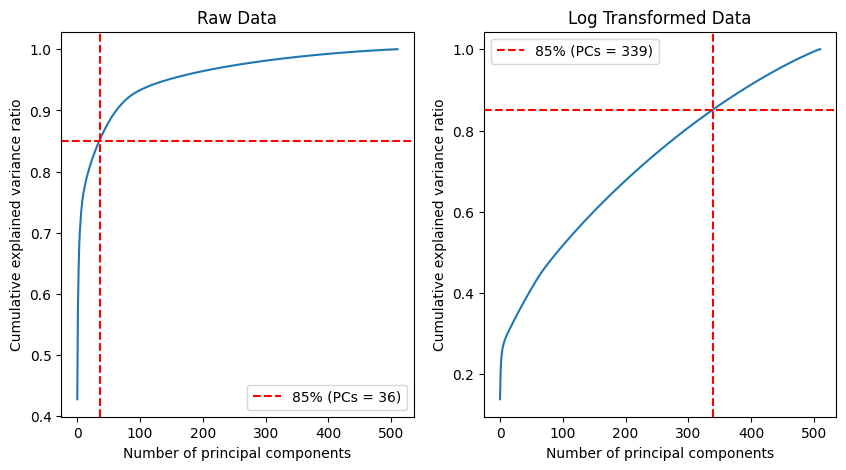

In [25]:
# Initialize the PCA object
# Since "n_components" is not specified, the default value is "min(n_samples, n_features)"
pca_raw = PCA()
pca_log = PCA()

# Fit the PCA model to the data and the log transformed data
data_raw_pca_fit = pca_raw.fit(dataset)
data_log_pca_fit = pca_log.fit(dataset_log)

# Get the explained variance ratio for the first principal component in both
# - raw data
# - log transformed data
data_raw_pc1_var_ratio = data_raw_pca_fit.explained_variance_ratio_[0]
data_log_pc1_var_ratio = data_log_pca_fit.explained_variance_ratio_[0]
print(
    "Explained variance ratio of PC1 (raw data): ", 
    data_raw_pc1_var_ratio
)
print(
    "Explained variance ratio of PC1 (log transformed): ", 
    data_log_pc1_var_ratio
)

# Side by side plot of the cumulative explained variance ratio of the first 
# principal component for the raw data and the log transformed data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(
    np.cumsum(data_raw_pca_fit.explained_variance_ratio_),
)
ax[1].plot(
    np.cumsum(data_log_pca_fit.explained_variance_ratio_),
)

# Add a horizontal line at 0.85
ax[0].axhline(y=0.85, color="r", linestyle="--")
ax[1].axhline(y=0.85, color="r", linestyle="--")


# Get the number of PCs needed to explain 85% of the variance
# (We calculate the cumulative sum, and then find the index of the first element
#  that is greater than or equal to 0.85. We add 1 to this index to get the number
#  of PCs needed, since indexes start from 0)
num_pcs_needed_raw = np.argmax(
    np.cumsum(data_raw_pca_fit.explained_variance_ratio_) >= 0.85
) + 1
num_pcs_needed_log = np.argmax(
    np.cumsum(data_log_pca_fit.explained_variance_ratio_) >= 0.85
) + 1

# Add a vertical line at the number of PCs needed to explain 85% of the variance
ax[0].axvline(
    x=float(num_pcs_needed_raw),
    color="r",
    linestyle="--",
    label=f"85% (PCs = {num_pcs_needed_raw})"
)
ax[1].axvline(
    x=float(num_pcs_needed_log),
    color="r",
    linestyle="--",
    label=f"85% (PCs = {num_pcs_needed_log})"
)

# Add labels and legend
ax[0].set_xlabel("Number of principal components")
ax[0].set_ylabel("Cumulative explained variance ratio")
ax[0].set_title("Raw Data")
ax[0].legend()

ax[1].set_xlabel("Number of principal components")
ax[1].set_ylabel("Cumulative explained variance ratio")
ax[1].set_title("Log Transformed Data")
ax[1].legend()

plt.show()

#### 4. Plotting without Visualization Technique

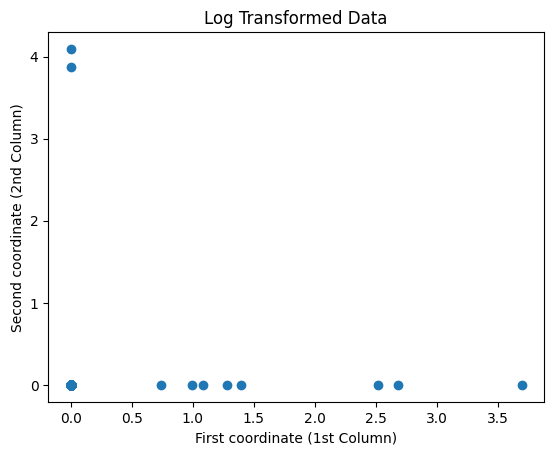

In [28]:
# Scatter plot with the first and second coordinates of the 
# log transformed data
plt.scatter(
    dataset_log[:, 0],
    dataset_log[:, 1],
)
plt.xlabel("First coordinate (1st Column)")
plt.ylabel("Second coordinate (2nd Column)")
plt.title("Log Transformed Data")
plt.show()

#### 5. PCA

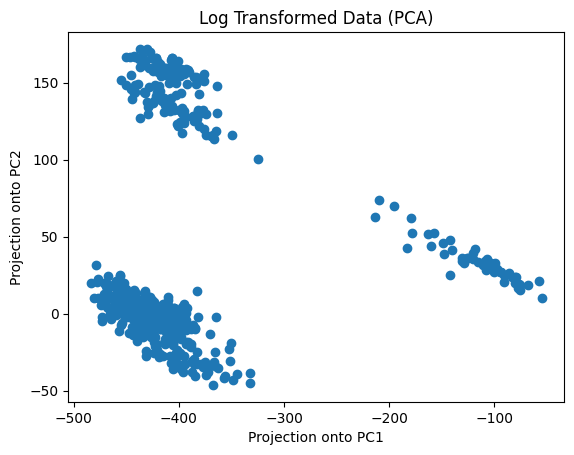

Number of visually distinct clusters: 3


In [30]:
# Find the top two principal components of the log transformed data
top_two_pcs = data_log_pca_fit.components_[:2, :]

# Scatter plot of the projections of the data onto
# the top two principal components
plt.scatter(
    np.dot(dataset_log, top_two_pcs[0, :]),
    np.dot(dataset_log, top_two_pcs[1, :]),
)
plt.xlabel("Projection onto PC1")
plt.ylabel("Projection onto PC2")
plt.title("Log Transformed Data (PCA)")
plt.show()

# Number of visually distinct clusters?
print("Number of visually distinct clusters: 3")

#### 6. MDS

c:\Users\eddysanoli\AppData\Local\pypoetry\Cache\virtualenvs\data_analysis-ayydRhdv-py3.9\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


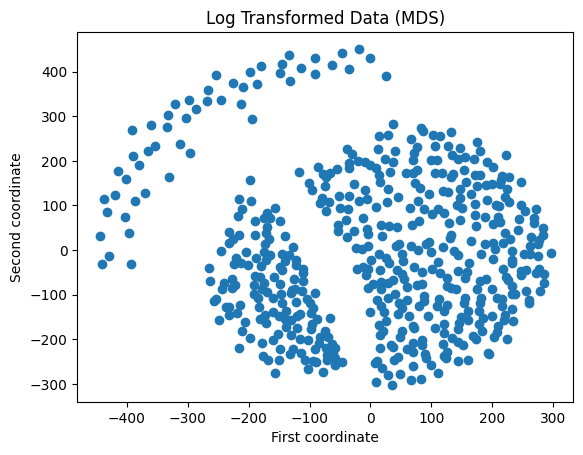

In [37]:
# Initialize the MDS object
# We set "n_components" to 2, since we want to visualize the data in 2D
mds = MDS(n_components=2) 

# Fit the MDS model to the data
data_mds_fit = mds.fit(dataset_log)

# Create a scatter plot of the MDS coordinates
plt.scatter(
    data_mds_fit.embedding_[:, 0],
    data_mds_fit.embedding_[:, 1],
)
plt.xlabel("First coordinate")
plt.ylabel("Second coordinate")
plt.title("Log Transformed Data (MDS)")
plt.show()

#### 7. t-SNE

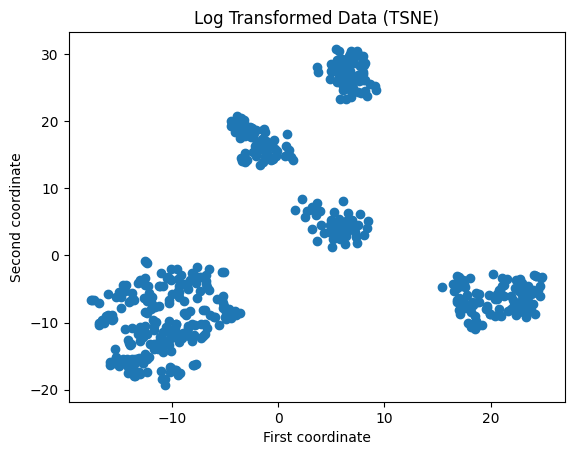

In [42]:
# Project the data onto the top 50 PCs
data_log_pca_fit_50 = PCA(n_components=50).fit(dataset_log) 

# Initialize the TSNE object with
# - "n_components" set to 2, since we want to visualize the data in 2D
# - "perplexity" set to 40
tsne = TSNE(n_components=2, perplexity=40)

# Fit the TSNE model on the data projected onto the top 50 PCs
data_tsne_fit = tsne.fit(data_log_pca_fit_50.transform(dataset_log))

# Create a scatter plot of the TSNE coordinates
plt.scatter(
    data_tsne_fit.embedding_[:, 0],
    data_tsne_fit.embedding_[:, 1],
)
plt.xlabel("First coordinate")
plt.ylabel("Second coordinate")
plt.title("Log Transformed Data (TSNE)")
plt.show()
